 ### Análise Descritiva a respeito do COVID-19 no Brasil
 
O objetivo deste mini projeto é fazer uma análise descritiva dos dados em relação ao covid-19 no Brasil.

Compreender melhor sua disseminação.

Observação: Estes dados foram coletados direto do site do ministério da saúde enquanto estavam sendo disponibilizados oficialmente.  

Os dados aqui presentes correspondem ao período de 30/01/2020 a 07/05/2020.

In [1]:
# Alguns imports para realizarmos a análise descritiva
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Carregando Arquivo
covid = pd.read_csv('arquivo_geral.csv', sep = ';', encoding = 'utf-8')

In [3]:
# Verificando a quantidade de registros
covid.shape

(2673, 7)

In [4]:
# Resumo estatístico
# Podemos reparar que os dados estão em uma escala diferente
covid.describe()

,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
count,2673.000000,2673.000000,2673.000000,2673.000000
mean,50.544706,690.875795,3.421624,44.888141
std,187.445668,2624.807049,14.876913,210.740571
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,0.000000
75%,26.000000,297.000000,1.000000,10.000000
max,3800.000000,39928.000000,224.000000,3206.000000


In [5]:
# Verificando o tipo primitivo de cada feature
# Possuimos algumas variáveis categóricas, contudo, não será necessário trata-las por agora, pois só iremos observar a evolução da doença
covid.dtypes

regiao              object
estado              object
data                object
casosNovos           int64
casosAcumulados      int64
obitosNovos          int64
obitosAcumulados     int64
dtype: object

In [6]:
# Visualizando as primeiras linhas do DataSet
covid.head(5)

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0
3,Norte,RO,2020-02-02,0,0,0,0
4,Norte,RO,2020-02-03,0,0,0,0


In [7]:
# Verificando o período dos registros
covid.data.sort_index(ascending= True).head(5)

0    2020-01-30
1    2020-01-31
2    2020-02-01
3    2020-02-02
4    2020-02-03
Name: data, dtype: object

In [8]:
# Verificando o período dos registros
covid.data.sort_index(ascending= False).head(5)

2672    2020-05-07
2671    2020-05-06
2670    2020-05-05
2669    2020-05-04
2668    2020-05-03
Name: data, dtype: object

In [9]:
# Removendo os registros duplicados somente em relação aos estados e regiões, mantendo os últimos registros.
# Por exemplo, caso tenhamos um dataset com 10 registros, se o 1º e o 10º forem iguais ele irá excluir o primeiro e manter o último
covid = covid.drop_duplicates(subset= ['regiao','estado'], keep = 'last')


In [10]:
# Verificando a quantidade de estados após a remoção das duplicatas
covid.estado.count()

27

### Análise Exploratória dos dados

Realizando a "pivotagem" dos dados, ou seja, observando por diferentes perspectivas.

In [11]:
# Verificando o total de óbitos e sua respectiva média 

totalObitos = covid['obitosAcumulados'].sum()
mediaObitos = covid.obitosAcumulados.mean()

totalCasos = covid.casosAcumulados.sum()

dict = {"Óbitos": totalObitos,
       "Media": [mediaObitos]}

totalMedia = pd.DataFrame(dict)

totalMedia["Media"] = totalMedia["Media"].map("{:2.2f}".format)

totalMedia


,Óbitos,Media
0,9146,338.74


In [12]:
# Comparativo entre o número de óbitos e casos em cada região

regiaoObitos = covid.groupby(['regiao']).sum()['obitosAcumulados'].rename("Mortes por Região")
regiaoCasos = covid.groupby(['regiao']).sum()['casosAcumulados'].rename("Casos por Região")
obitosPorcentagem = (regiaoObitos / totalObitos)*100
casosPorcentagem = (regiaoCasos / totalCasos)* 100

dict2 = {"Óbitos por Região": regiaoObitos, 
         "Percentual de Óbitos": obitosPorcentagem, 
         "Casos por Região": regiaoCasos,
        "Percentual de Casos": casosPorcentagem}

dict2['Percentual de Óbitos'] = dict2["Percentual de Óbitos"].map("{:2.2f}%".format)
dict2['Percentual de Casos'] = dict2["Percentual de Casos"].map("{:2.2f}%".format)

dadosRegiao = pd.DataFrame(dict2)
dadosRegiao


,Óbitos por Região,Percentual de Óbitos,Casos por Região,Percentual de Casos
regiao,,,,
Centro-Oeste,102,1.12%,4013,2.97%
Nordeste,2553,27.91%,42157,31.20%
Norte,1373,15.01%,21377,15.82%
Sudeste,4861,53.15%,60692,44.92%
Sul,257,2.81%,6867,5.08%


### Funções para Plotagem dos Gráficos
Estas funções irão ser úteis na construção da dashboard

In [13]:
def plot1():
    plt.bar(covid.regiao, covid.obitosAcumulados, color = 'red', label = 'Óbitos')
    plt.legend()
    plt.xlabel("Regiões")
    plt.ylabel("Óbitos")
    plt.title("Regiões x Óbitos", fontsize = 16)

In [14]:
def plot2():
    
    labels =  regiaoCasos.index
    plt.pie(regiaoCasos)
    plt.title("Casos por região", fontsize = 18)
    plt.legend(labels, bbox_to_anchor = [1, 1])
      

In [15]:
def plot3():
    labels =  regiaoObitos.index
    plt.pie(regiaoObitos)
    plt.title("Óbitos por região", fontsize = 18)
    plt.legend(labels, bbox_to_anchor = [1, 1])

In [16]:
def plot4():
    covid['2020/03']['obitosAcumulados'].plot(color = 'green')
    covid['2020/04']['obitosAcumulados'].plot(color = 'red')
    plt.title("Evolução dos Óbitos durante os meses de Março e Abril", fontsize = 18)
    plt.xlabel("Data")


### Plotando gráficos para melhor compreensão

Como já haviamos vusualizado anteriormente nas tabelas comparativas as regiões sudeste e nordeste são os locais com 

maior índice de casos e óbitos, isso em relação as outras regiões do brasil.

Se levarmos em consideração o número de habitantes de cada região, é compreensivel essa discrepância, observe:

-------------------------------------------------------|

Posição	     Região	       População	   % da pop. 

1	Região   Sudeste	   88 371 433	   42,05%	 
2	Região   Nordeste	   57 071 654	   27,16%	 
3	Região   Sul	       29 975 984	   14,26%	 
4	Região   Norte	       18 430 980	   8,77%	 
5	Região   Centro-Oeste  16 297 074	   7,76%	 

--------------------------------------------------------|

A região sudeste corresponde a 42,05% da população do Brasil enquanto o nordeste equivale a 27,16%. Considerando também que

o estado de São Paulo é o mais populoso do Brasil, ou seja, possui um maior fluxo de pessoas se locomovendo, principalmente em quesitos profissionais, viagens a trabalho, logo é algo lógico a doença ter se espalhando por este estado de maneira mais severa.


Informações retiradas dos seguintes sites:

https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o


https://jovempan.com.br/noticias/brasil/sao-paulo-e-o-estado-mais-populoso-com-quase-30-da-populacao-brasileira.html#:~:text=Com%2045%2C5%20milh%C3%B5es%20de,nesta%20quarta%2Dfeira%2C%2029.

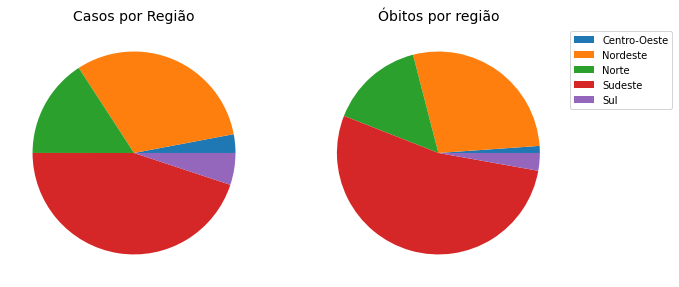

In [17]:
# Visualizando gráficamente os dados comparativos entre óbitos e casos por região
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].pie(regiaoCasos)
ax[0].set_title("Casos por Região", fontsize = 14)

ax[1].pie(regiaoObitos)
ax[1].set_title("Óbitos por região", fontsize = 14)
ax[1].legend(regiaoCasos.index, bbox_to_anchor = [1, 1])
plt.show()

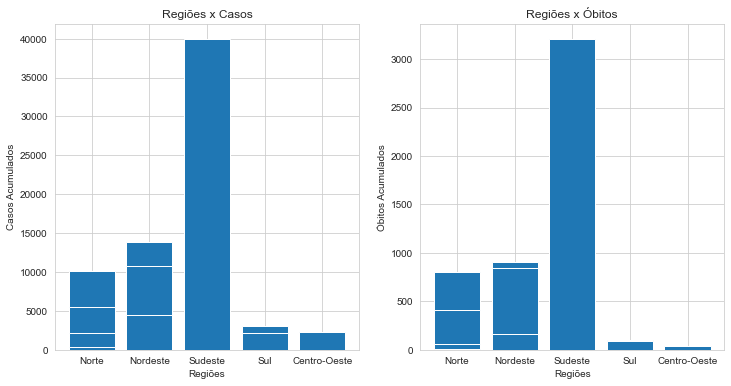

In [18]:
# Usando bar plot do pacote matplotlib para visualizarmos os dados por outra perspectiva
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2, figsize = (12,6))
ax[0].bar(covid.regiao, covid.casosAcumulados)
ax[0].set_title("Regiões x Casos")
ax[0].set_xlabel("Regiões")
ax[0].set_ylabel("Casos Acumulados")

ax[1].bar(covid.regiao,covid.obitosAcumulados)
ax[1].set_title("Regiões x Óbitos")
ax[1].set_xlabel("Regiões")
ax[1].set_ylabel("Óbitos Acumulados")

plt.show()

Carregando novamente o dataset, contudo, desta vez estamos transformando a coluna "data" em um objeto do tipo data realmente.

In [19]:
covid = pd.read_csv("arquivo_geral.csv", sep = ';', encoding = 'utf-8', parse_dates = ['data'])

In [20]:
# Configurando a coluna data com índice para fazermos slicing 
covid.set_index('data', inplace= True)

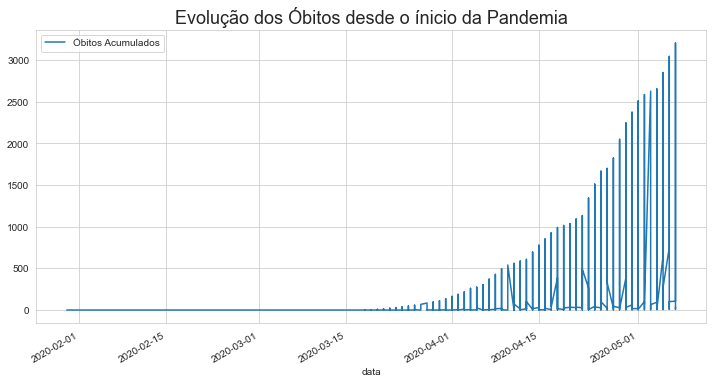

In [21]:
plt.figure(figsize=(12,6))
covid['2020']['obitosAcumulados'].plot(label = "Óbitos Acumulados")
plt.legend()
plt.title("Evolução dos Óbitos desde o ínicio da Pandemia", fontsize = 18)
plt.show()

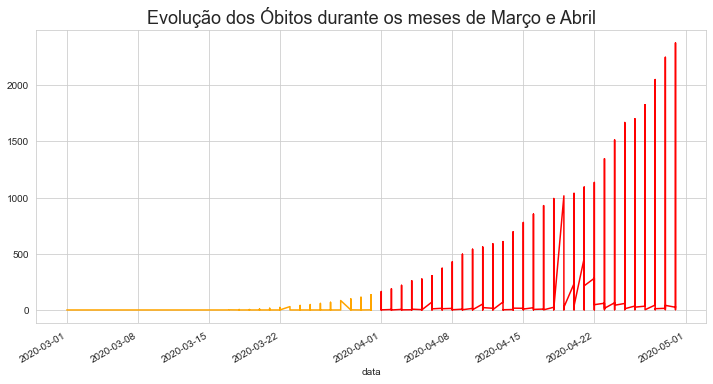

In [22]:
plt.figure(figsize=(12,6))
covid['2020/03']['obitosAcumulados'].plot(color = 'orange')
covid['2020/04']['obitosAcumulados'].plot(color = 'red')
plt.title("Evolução dos Óbitos durante os meses de Março e Abril", fontsize = 18)
plt.show()

### Desenhando o modelo de dashboard desejado
   WireFrame

        WireFrame
```
|---------------------|
       Plot1
|---------------------|
|  Plot2   |   PLot3  |
|---------------------|
        Plot4
|---------------------|

```


### Definindo o estilo dos gráficos para a dashboard

In [23]:
#estilos/personalestilo-1.mplstyle
print(plt.style.available); plt.style.use("fivethirtyeight")

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Construindo a dashboard que servirá como suporte para os gráficos

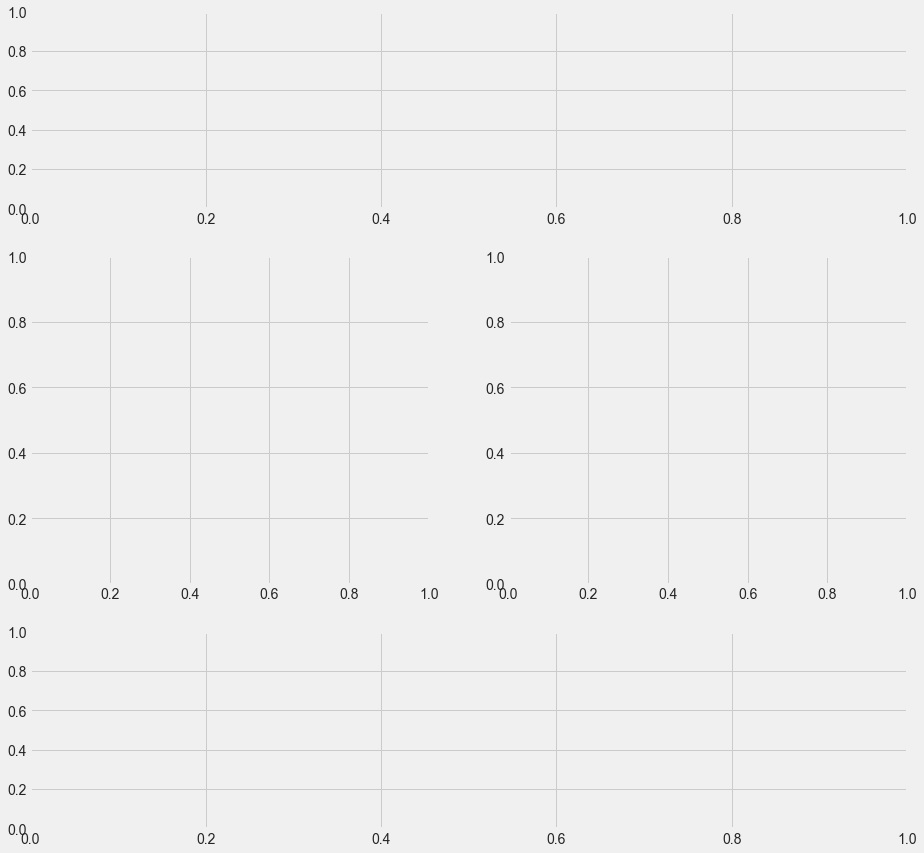

In [24]:
suporte = plt.figure(figsize = (14,14))

gs_master = mpl.gridspec.GridSpec(3,1, height_ratios = [30,50,30])

#camada 1
grid1 = mpl.gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec= gs_master[0,:])
plot11 = suporte.add_subplot(grid1[0,:])

#camada 2

grid2 = mpl.gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs_master[1,:])
plot12 = suporte.add_subplot(grid2[0,0])

plot13 = suporte.add_subplot(grid2[0,1])


# camada 3

grid3 = mpl.gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gs_master[2,:])
plot14 = suporte.add_subplot(grid3[0,:])


### Construindo a DashBoard

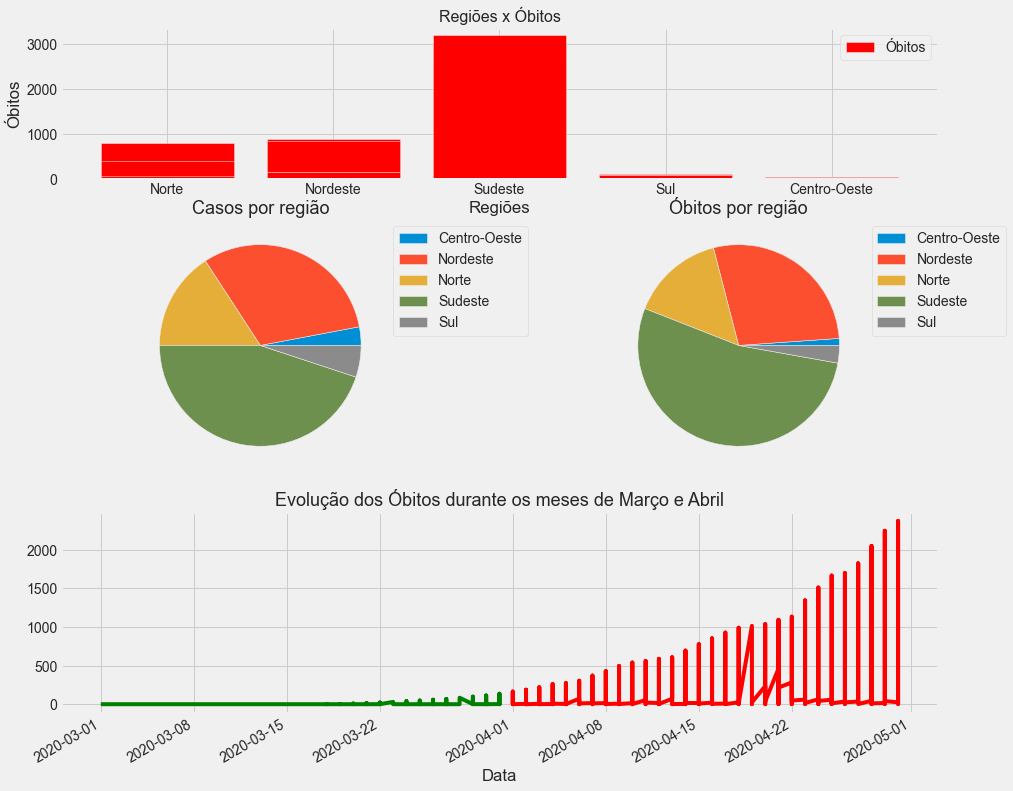

In [25]:
suporte = plt.figure(figsize = (14,14))

gs_master = mpl.gridspec.GridSpec(3,1, height_ratios = [30,50,40])

#camada 1
grid1 = mpl.gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec= gs_master[0,:])
plot11 = suporte.add_subplot(grid1[0,:])
plot11 = plot1()

#camada 2

grid2 = mpl.gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs_master[1,:])
plot12 = suporte.add_subplot(grid2[0,0])
plot12 = plot2()

plot13 = suporte.add_subplot(grid2[0,1])
plot13 = plot3()


# camada 3

grid3 = mpl.gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gs_master[2,:])
plot14 = suporte.add_subplot(grid3[0,:])
plot14 = plot4()

#salvei antes de chamar o método show() pois depois ele reseta se eu não o por dentro de uma váriavel 
plt.savefig("DashBoard_Covid19.png")
plt.show()



### <html><font size = 6><font color = "blue">Conclusão</font></font></html>

Podemos reparar nesta rápida análise que o covid-19, doença causada pelo vírus denominado Corona, chegou ao Brasil e se manteve estagnado

nos primeiros dois meses de pandemia e que desde então vem havendo uma crescente tanto no número de casos como no de óbitos.

Hoje no momento em que estou reanalisando este dataset, 04/08/2020, estão sendo testadas diversas vacinas e a previsão é que até dezembro elas estejam 

disponíveis para serem iniciadas as campanhas de vacinação.